Importing Usual Libraries

In [ ]:
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


Getting the data

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:, [2, 3]]
y = iris.target

In [ ]:
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

In [ ]:
print(iris_df.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 105 samples in the training set and 45 samples in the test set



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


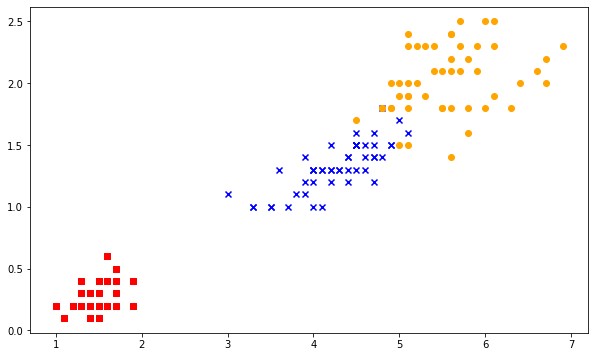

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'orange')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_std, y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 0.98 out of 1 on test data
